# **About the Company**

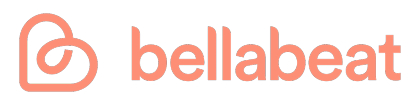

>[Bellabeat](https://bellabeat.com/) is a high-tech company specialized in the production of health-focused smart products. Established in 2013 by Urška Sršen (Co-founder and CCO) and Sando Mur (Co-founder and Mathematician), Bellabeat's mission is to empower women by collecting data on their activity, sleep, stress, and reproductive health through the use of smart devices, providing them with valuable insights into their well-being and habits.

# **About the Project**
## **Business Task**
Analyze FitBit Fitness Tracker data to gain insights into how consumers are using the app and explore growth opportunities for the Bellabeat marketing strategy.
  
## **Skateholders**
* Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
* Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
* Bellabeat marketing analytics team: A team of data analysts responsible for collecting, analyzing, and    reporting data that helps guide Bellabeat’s marketing strategy. You joined this team six months ago and     have been busy learning about Bellabeat’’s mission and business goals — as well as how you, as a junior     data analyst, can help Bellabeat achieve them.
  
## **Questions**
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?


# **Data Source**
The [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit) is a publicly accessible dataset provided by Möbius under the CC0 data protection license. This dataset consists of data from thirty (30) eligible Fitbit users who have granted their consent for the sharing of their personal tracker data. The data includes minute-level information on physical activity, heart rate, and sleep monitoring. It comprises eighteen (18) .csv files that consolidate details about daily activities, step counts, and heart rate, making it a valuable resource for examining user habits.

The following code chunk allows the loading of packages necessary to develop this report.

In [1]:
# Loading Packages

library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# **Importing Dataset**

This code chunk allows for the import of the .csv (**read.csv()**) files with the needed data and assigns easy-to-understand names to them for clarity.

In [2]:
Activity <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
Calories <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
Intensities <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
Steps <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
Sleep <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

# **Data Credibility**
I will employ the ROCCC (Reliable, Original, Comprehensive, Current, and Cited) data evaluation model to assess the dataset's credibility and reliability.
* Reliable – *LOW* – Small Sample.
* Original – *LOW*  – Data collected from third-party source (Data originally distributed by Amazon Mechanical Turk). 
* Comprehensive – *MEDIUM* – Contain majority of critical information needed to answer the question or find the solution.
* Current – *LOW*  – Outdated (Data collected 7 years ago).
* Cited – *LOW*  – Not a trusted source.

**OBS**: Overall, the dataset is pour due to its limited credibility and reliability. While it does provide sufficient information to address the company's inquiries, there is room for enhancement by incorporating data related to gender, age, and other inherent individual factors.

# **Data Processing**

This code chunk allows for the preview of every data frame using the **head()** function to identify any gaps in the data or data types. Here, I've included only the *Activity* data frame as an example.

In [3]:
# Previewed the dataset with head() function

head(Activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


#### **Find Null/Missing values** 

Check for null or missing values in the dataset. This is accomplished using the **is.na()** function, and the **sum()** function helps in counting the number of missing/null values.

In [4]:
sum(is.na(Activity)) # Displays the SUM of missing values in each table
sum(is.na(Calories))
sum(is.na(Intensities))
sum(is.na(Steps))
sum(is.na(Sleep))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

Since there were missing values in the *Activity* dataset, I will utilize the **na.omit()** function.

In [5]:
# Removing Null/Missing Values
Activity <- na.omit(Activity)

#### **Find Duplicated Records** 

The following code chunk allows for the detection of duplicated entries using the **duplicated()** function.

In [6]:
duplicated(Activity)
duplicated(Calories)
duplicated(Intensities)
duplicated(Steps)
duplicated(Sleep)

# There are no duplicated values

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[613] FALSE FALSE FALSE 

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[613] FALSE FALSE FALSE 

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[613] FALSE FALSE FALSE 

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[613] FALSE FALSE FALSE 

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[157] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
[169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
[229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
[385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[409] FALSE FALSE FALSE FALSE FALSE

#### **Unique IDs in each dataset** 

The following codes have been run to check the number of unique Id in each table.

In [7]:
# Find unique IDs in each dataset
id_Act <- length(unique(Activity$Id))
id_Cal <- length(unique(Calories$Id))
id_Int <- length(unique(Intensities$Id))
id_St <- length(unique(Steps$Id))
id_Sl <- length(unique(Sleep$Id))

#Lets display the number of unique id for each dataframe
message("No. of Activity Id: ", id_Act)
message("No. of Calories Id: ", id_Cal)
message("No. of Intensities Id: ", id_Int)
message("No. of Steps Id: ", id_St)
message("No. of Sleep Id: ", id_Sl)

No. of Activity Id: 33

No. of Calories Id: 33

No. of Intensities Id: 33

No. of Steps Id: 33

No. of Sleep Id: 24



These results indicate inconsistencies in the dataset, as we were initially expecting to find only 30 unique IDs in each one. However, we have discovered 3 additional IDs in the *Activity*, *Calories*, *Intensities*, and *Steps* datasets, while 6 IDs are missing in the *Sleep* dataset.

#### **Checking data types in each dataset** 

Ensure the accuracy of data types for each column in every dataset by utilizing the **str()** function.

In [8]:
str(Activity)
str(Calories)
str(Intensities)
str(Steps)
str(Sleep)

# The dates columns are being considered as chr

'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

The date columns are being considered as *'character'* types, and we need them to be treated as *'date/time'* types.

#### **Transforming Data** 

The following code chunk is divided into three (3) different areas. Firstly, I rename the columns *'ActivityDate'* to *'Date'* (**rename()**) in all datasets to make them easier to understand and call. Furthermore, as I showed before, the *'Date'* columns are being considered as *'chr'* data type, and we need them to be in *'ddtm'* data type, so I run the function **as.Date()** for each dataset to change and format it. The last part was done to facilitate the analysis processing by adding a column to each dataset with the day of the week based on the data, allowing me to conduct a weekly analysis of the data.

**OBS:** The **as.Date()** function causes the loss of the time component associated with dates. However, since I won't be using it in further analysis, I used this function because it's easier to apply. If I didn't want to lose the time component, I could use the **as.POSIXlt()** function, but this requires a well-structured dataset.

In [9]:
# Rename columns for easier reading
Activity <- Activity %>% rename("Date" = "ActivityDate")
Calories <- Calories %>% rename("Date" = "ActivityDay")
Intensities <- Intensities %>% rename("Date" = "ActivityDay")
Steps <- Steps %>% rename("Date" = "ActivityDay")
Sleep <- Sleep %>% rename("Date" = "SleepDay")

# Change Date/Time columns in each dataframe to datetime type
Activity$Date <- as.Date(Activity$Date, format = "%m/%d/%Y")
Calories$Date <- as.Date(Calories$Date, format = "%m/%d/%Y")
Intensities$Date <- as.Date(Intensities$Date, format = "%m/%d/%Y")
Steps$Date <- as.Date(Steps$Date, format = "%m/%d/%Y")
Sleep$Date <- as.Date(Sleep$Date, format = "%m/%d/%Y")

# Adding a Column with days of the week 
# Activity
Day_of_Week <- weekdays(Activity$Date) 
Activity$Day_of_Week <- Day_of_Week
#Calories
Day_of_Week <- weekdays(Calories$Date) 
Calories$Day_of_Week <- Day_of_Week
#Intensities
Day_of_Week <- weekdays(Intensities$Date) 
Intensities$Day_of_Week <- Day_of_Week
#Steps
Day_of_Week <- weekdays(Steps$Date) 
Steps$Day_of_Week <- Day_of_Week
#Sleep
Day_of_Week <- weekdays(Sleep$Date) 
Sleep$Day_of_Week <- Day_of_Week

# **Data Analysis**

Now that the data is clean, I will then perform data analysis.

#### **Statistics Overview** 

The following code chunk enables me to select the most relevant data using the **select()** function. After that, I apply the **summary()** function to obtain some basic statistical values.

In [10]:
# Activity
    Activity %>% 
        select(TotalSteps,
              TotalDistance,
              Calories) %>% 
        summary()
# Intensities
    Intensities %>% 
        select(SedentaryMinutes,
               LightlyActiveMinutes,
               FairlyActiveMinutes,
               VeryActiveMinutes) %>% 
        summary()
#Sleep
    Sleep %>% 
        select(TotalMinutesAsleep, 
               TotalTimeInBed) %>% 
        summary()

   TotalSteps    TotalDistance       Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :4900  

 SedentaryMinutes LightlyActiveMinutes FairlyActiveMinutes VeryActiveMinutes
 Min.   :   0.0   Min.   :  0.0        Min.   :  0.00      Min.   :  0.00   
 1st Qu.: 729.8   1st Qu.:127.0        1st Qu.:  0.00      1st Qu.:  0.00   
 Median :1057.5   Median :199.0        Median :  6.00      Median :  4.00   
 Mean   : 991.2   Mean   :192.8        Mean   : 13.56      Mean   : 21.16   
 3rd Qu.:1229.5   3rd Qu.:264.0        3rd Qu.: 19.00      3rd Qu.: 32.00   
 Max.   :1440.0   Max.   :518.0        Max.   :143.00      Max.   :210.00   

 TotalMinutesAsleep TotalTimeInBed 
 Min.   : 58.0      Min.   : 61.0  
 1st Qu.:361.0      1st Qu.:403.0  
 Median :433.0      Median :463.0  
 Mean   :419.5      Mean   :458.6  
 3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :796.0      Max.   :961.0  

#### **Statistical Findings** 

* On average, users covered a total of **7,638 steps**, which is roughly equivalent to a distance of about **5.5 kilometers**. According to the [World Health Organization](https://www.who.int/news-room/fact-sheets/detail/physical-activity), assuming that the users were healthy adults aged 18-64, this figure should ideally increase to at least [10,000 steps per day](https://pubmed.ncbi.nlm.nih.gov/14715035/). Achieving this daily step goal can significantly lower the risk of developing various diseases and promote overall health. 
* Users, on average, allocated **991 minutes to a sedentary lifestyle**, equivalent to **roughly 17 hours a day spent sitting or lying down**. The [World Health Organization](https://www.who.int/news-room/fact-sheets/detail/physical-activity) advises that for healthy adults aged 18-64, this duration should be minimized by substituting it with physical activity of any intensity to promote better health.
* On average, users engaged in **approximately 192.8 minutes of light activity, 13.56 minutes of moderate activity, and 21.16 minutes of vigorous activity**. According to the [World Health Organization's](https://www.who.int/news-room/fact-sheets/detail/physical-activity) guidelines, these values should be elevated to achieve, by the end of the week, a minimum of 150-300 minutes of moderate-intensity physical activity, at least 75-150 minutes of vigorous-intensity activity, or a combination of both, to promote overall well-being.
* Users burned an average of **2,304 calories per day**.
* On average, **users slept for approximately 7 hours**, which falls short of the minimum recommended sleep duration. Ideally, this should be increased to at least 8 hours per day for optimal well-being.

### **Examining Sleep Patterns: Time Spent in Bed vs. Time Asleep and Opportunities for Sleep Improvement** 

# A tibble: 7 × 3
  Day_of_Week Mean_TimeInBed Mean_TimeAsleep
  <chr>                <dbl>           <dbl>
1 Friday                445.            405.
2 Monday                456.            419.
3 Saturday              461.            421.
4 Sunday                504.            453.
5 Thursday              436.            402.
6 Tuesday               443.            405.
7 Wednesday             470.            435.


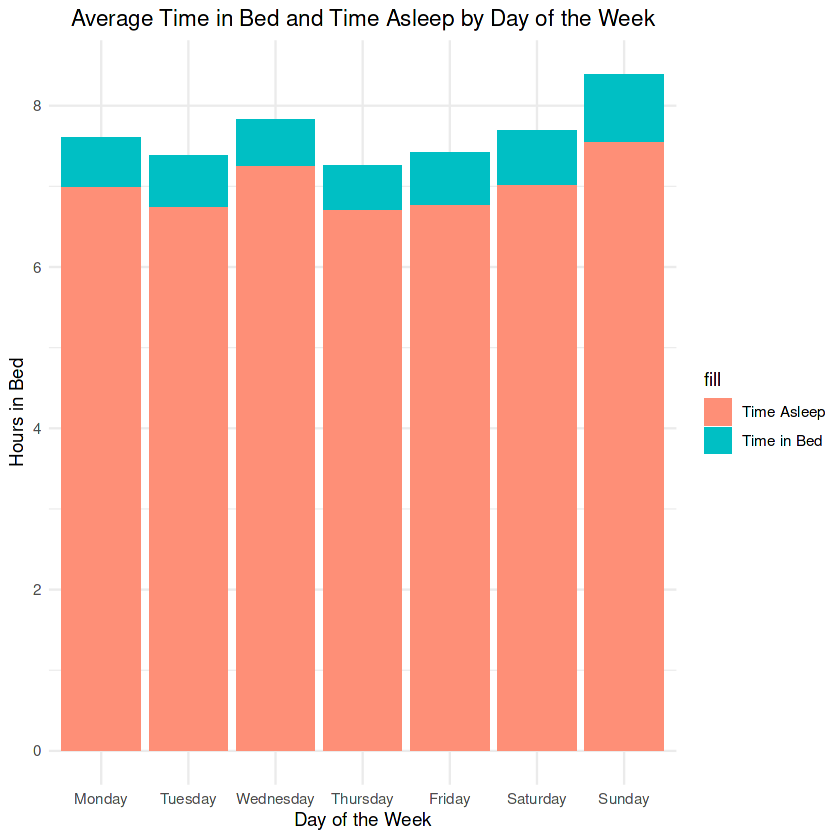

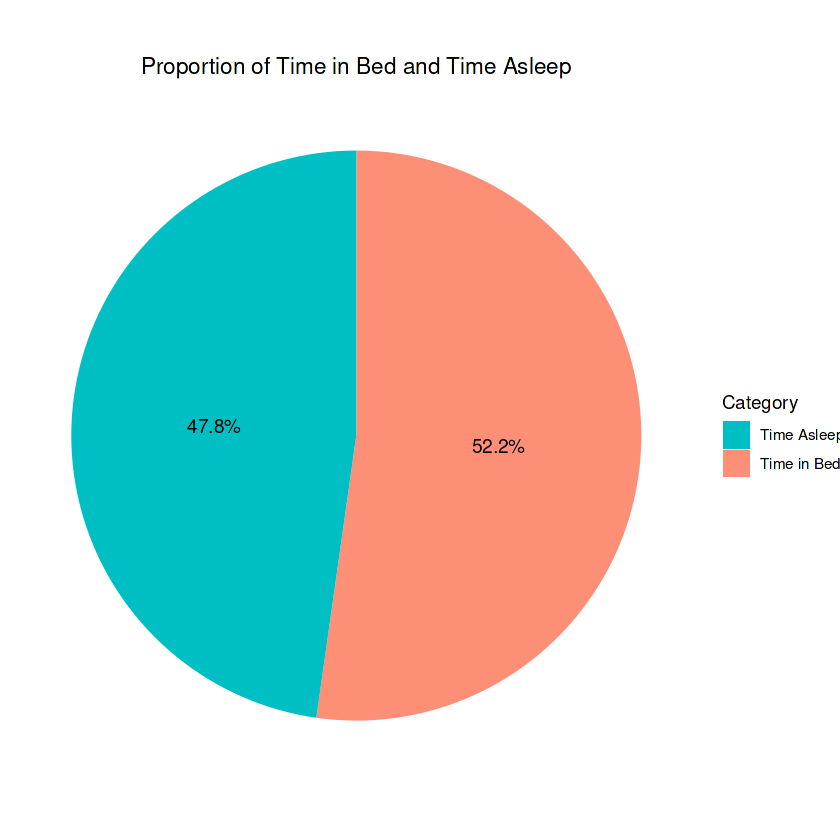

In [11]:
Tab1 <- Sleep %>%
  group_by(Day_of_Week) %>%
  summarize(
    Mean_TimeInBed = mean(TotalTimeInBed),
    Mean_TimeAsleep = mean(TotalMinutesAsleep)
  ) 
print(Tab1)

# Bar chart code
    # Convert minutes to hours
    Tab1$Mean_TimeInBed <- Tab1$Mean_TimeInBed / 60
    Tab1$Mean_TimeAsleep <- Tab1$Mean_TimeAsleep / 60

    # Order days of week
    Tab1$Day_of_Week <- factor(Tab1$Day_of_Week, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

    # Create a bar chart
    ggplot(data = Tab1, aes(x = Day_of_Week)) +
      geom_bar(aes(y = Mean_TimeInBed, fill = "Time in Bed"), stat = "identity", position = "dodge") +
      geom_bar(aes(y = Mean_TimeAsleep, fill = "Time Asleep"), stat = "identity", position = "dodge") +
      labs(title= "Average Time in Bed and Time Asleep by Day of the Week", x = "Day of the Week", y = "Hours in Bed") +
      scale_fill_manual(values = c("Time in Bed" = "#00bfc4", "Time Asleep" = "#fe8f77")) +
      theme_minimal() +
      theme(
        plot.title = element_text(hjust = 0.5)
      )

# Pie Chart Code
    # Calculate the total time in bed and total time asleep
    total_time_in_bed <- sum(Tab1$Mean_TimeInBed)
    total_time_asleep <- sum(Tab1$Mean_TimeAsleep)

    # Create a data frame for the pie chart
    pie_data <- data.frame(
      Category = c("Time in Bed", "Time Asleep"),
      Value = c(total_time_in_bed, total_time_asleep)
    )

    # Calculate percentages
    pie_data$Percentage <- pie_data$Value / sum(pie_data$Value) * 100

    # Create the pie chart with percentages
    custom_colors <- c("#00bfc4", "#fe8f77")
    ggplot(data = pie_data, aes(x = "", y = Value, fill = Category, label = Percentage)) +
      geom_bar(stat = "identity", width = 1) +
      geom_text(aes(label = paste0(round(Percentage, 1), "%")), position = position_stack(vjust = 0.5) ) +
      coord_polar(theta = "y") +
      scale_fill_manual(values = custom_colors) +  # Set custom colors
      labs(title = "Proportion of Time in Bed and Time Asleep", fill = "Category") +
      theme_void() +
      theme(plot.title = element_text(hjust = 0.5))

**Insights:**
* The table above enable us to conclude that **users spend approximately 39 minutes more in bed than they do sleeping**, with the pie chart indicating a 4.4% difference.
* Moreover, the bar chart helps us understand that users spent more time in bed on **Sunday** and **Wednesday** compared to the other weekdays.
* With that in mind, enhancing the user experience of Bellabeat's smart devices could encompass the integration of a notification system. This system, when configured by the user, would serve as a reminder to initiate their bedtime routine.

### **Exploring the Relationship Between Steps and Calorie Burn: Implications for User Activity and Health** 

Warning message:
“Use of `Tab2$StepTotal` is discouraged.
ℹ Use `StepTotal` instead.”
Warning message:
“Use of `Tab2$Calories` is discouraged.
ℹ Use `Calories` instead.”
`geom_smooth()` using formula = 'y ~ x'


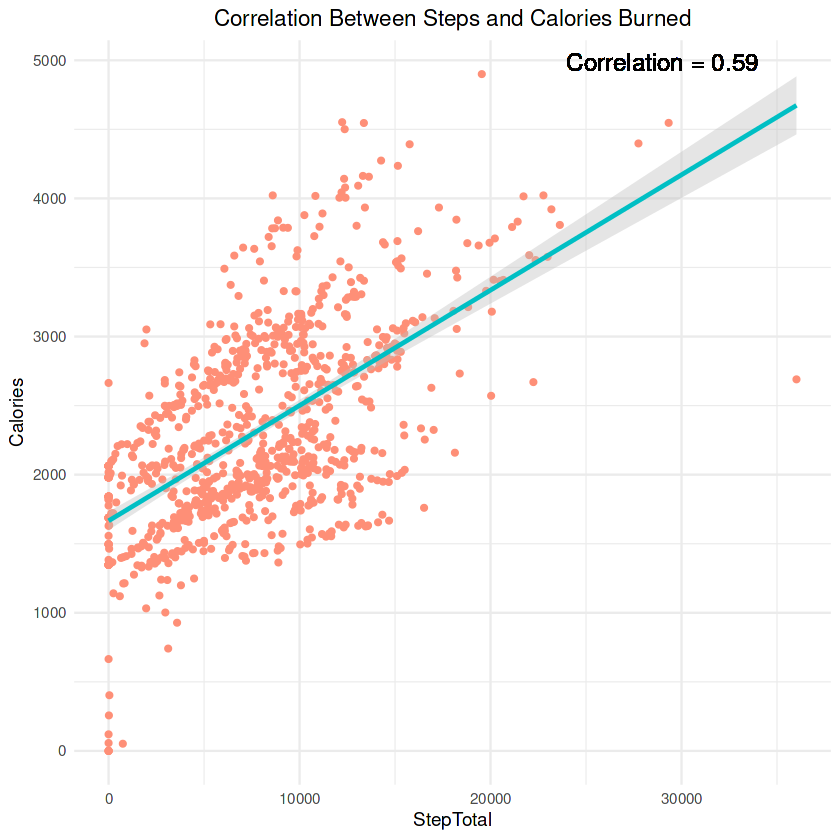

In [12]:
Tab2 <- merge(Calories, Steps, by = c('Id', 'Date'))

# Create the scatter plot with a regression line and shadow
p <- ggplot(data = Tab2, aes(x = StepTotal, y = Calories)) +
  geom_point(shape = 20, size = 2, color = "#fe8f77") +  # Customize the appearance of points
  geom_smooth(method = 'lm', se = TRUE, color = "#00bfc4", fill = "grey") + # Add a regression line with shadow
  labs(title = "Correlation Between Steps and Calories Burned") +
  theme_minimal()+
  theme(
    plot.title = element_text(hjust = 0.5)
  )

# Calculate the correlation coefficient
correlation_value <- cor(Tab2$StepTotal, Tab2$Calories)

# Add the correlation value as a text annotation within the plot
p + geom_text(aes(x = max(Tab2$StepTotal), y = max(Tab2$Calories),
                   label = paste("Correlation =", round(correlation_value, 2))),
              hjust = 1.2, vjust = -0.2, color = "black", size = 5)

**Insight:**
* The scatter plot presented above enables us to identify a positive correlation between steps taken and calorie expenditure, suggesting that as one variable increases, the other is also likely to increase. The coefficient value of 0.59 indicates a moderately strong positive correlation between these variables. This could suggest that the steps taken may have been at a lower intensity level, as lower intensity typically results in lower calorie expenditure.
* In light of the above, Bellabeat can improve their users' calorie expenditure in relation with their steps by developing a system that provides users with reminders to stand up and engage in short walks. These reminders can motivate users to choose stairs over elevators and adopt other active habits.

### **Understanding User Activity Patterns** 

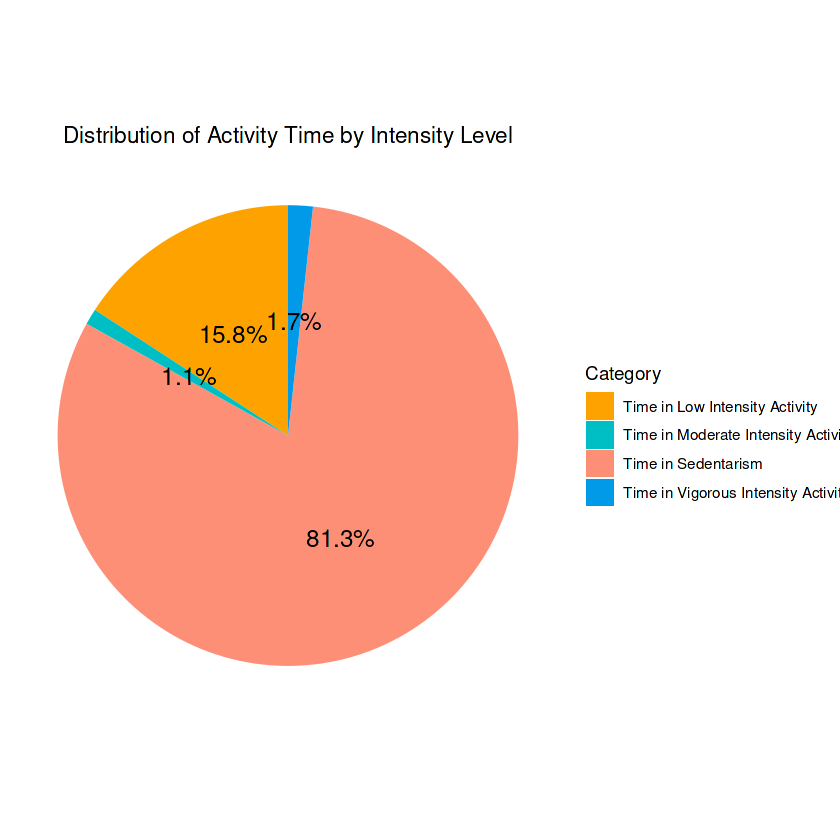

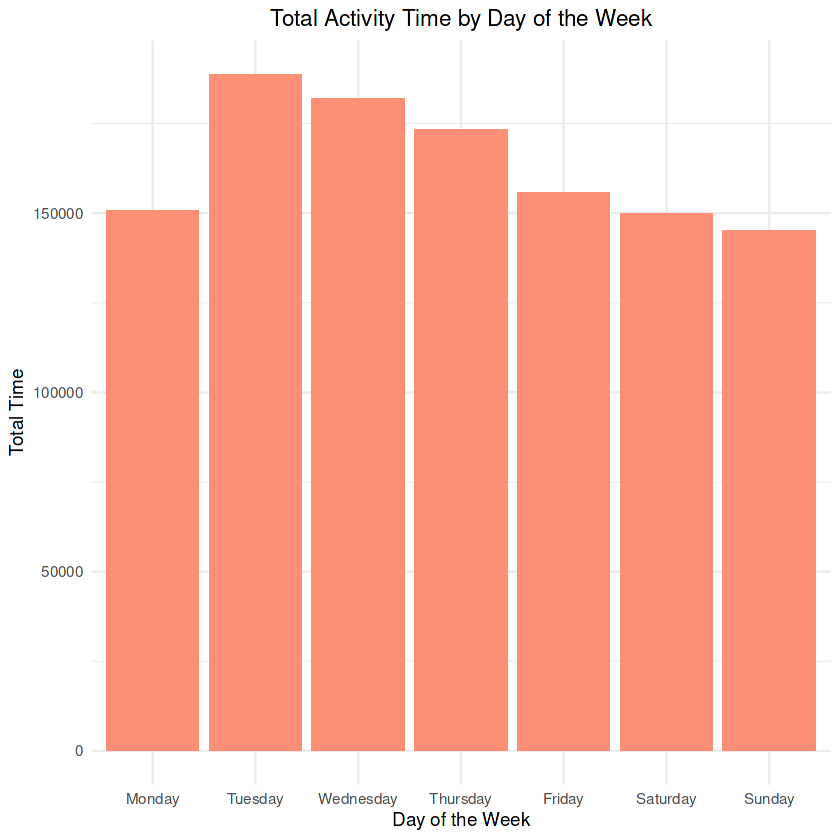

In [13]:
Tab3 <- Activity %>%
  group_by(Day_of_Week) %>%
  summarize(
    Mean_Sedentary = mean(SedentaryMinutes),  
    Mean_LowActivity = mean(LightlyActiveMinutes),
    Mean_ModActivity = mean(FairlyActiveMinutes),
    Mean_VigActivity = mean(VeryActiveMinutes),  
  ) 
# Pie Chart Code
    # Calculate the total time in each actvity
    Total_Time_Sed <- sum(Tab3$Mean_Sedentary)
    Total_Time_Low <- sum(Tab3$Mean_LowActivity)
    Total_Time_Mod <- sum(Tab3$Mean_ModActivity)
    Total_Time_Vig <- sum(Tab3$Mean_VigActivity)

    # Create a data frame for the pie chart
    pie_data <- data.frame(
      Category = c("Time in Sedentarism", "Time in Low Intensity Activity", "Time in Moderate Intensity Activity", "Time in Vigorous Intensity Activity"),
      Value = c(Total_Time_Sed, Total_Time_Low, Total_Time_Mod, Total_Time_Vig)
    )

    # Calculate percentages
    pie_data$Percentage <- pie_data$Value / sum(pie_data$Value) * 100

    # Create the pie chart with percentages
    custom_colors <- c("#fea200", "#00bfc4", "#fe8f77", "#019ae9")
    ggplot(data = pie_data, aes(x = "", y = Value, fill = Category, label = Percentage)) +
      geom_bar(stat = "identity", width = 4) +
      geom_text(aes(label = paste0(round(Percentage, 1), "%")), position = position_stack(vjust = 0.5), size = 5) +
      coord_polar(theta = "y") +
      scale_fill_manual(values = custom_colors) +  # Set custom colors
      labs(title = "Distribution of Activity Time by Intensity Level", fill = "Category") +
      theme_void() +
      theme(plot.title = element_text(hjust = 0.5)
    )

# Bar Chart Code
    # Calculate the total time in activities for each day of the week
    Total_Time_Day <- Activity %>%
      group_by(Day_of_Week) %>%
      summarize(
        Total_Time = sum(SedentaryMinutes + LightlyActiveMinutes + FairlyActiveMinutes + VeryActiveMinutes)
      )
    # Order days of week
    Total_Time_Day$Day_of_Week <- factor(Total_Time_Day$Day_of_Week, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

    # Create Bar Chart
    ggplot(data = Total_Time_Day, aes(x = Day_of_Week, y = Total_Time)) +
      geom_bar(stat = "identity", fill = "#fe8f77") +
      labs(title = "Total Activity Time by Day of the Week", x = "Day of the Week", y = "Total Time") +
      theme_minimal() +
      theme(
        plot.title = element_text(hjust = 0.5)
      )

**Insights:**
* The pie chart provides a clear depiction of the user's daily routine, showing that **81% of their time is spent in a sedentary lifestyle**, with **only 19% dedicated to activities**. Among these activities, low-intensity activity occupies the largest portion at approximately 16%.
* The bar chart helps us comprehend the distribution of activities throughout the weekdays, with **Tuesday**, **Wednesday**, and **Thursday** emerging as the days with the highest levels of activity.
* Considering the information above, Bellabeat could enhance the user experience by implementing a feature that reminds users to take short breaks and stretch while working and to achieve at least the minimum daily exercise levels.

# **Key Takeaways and Recommendations**

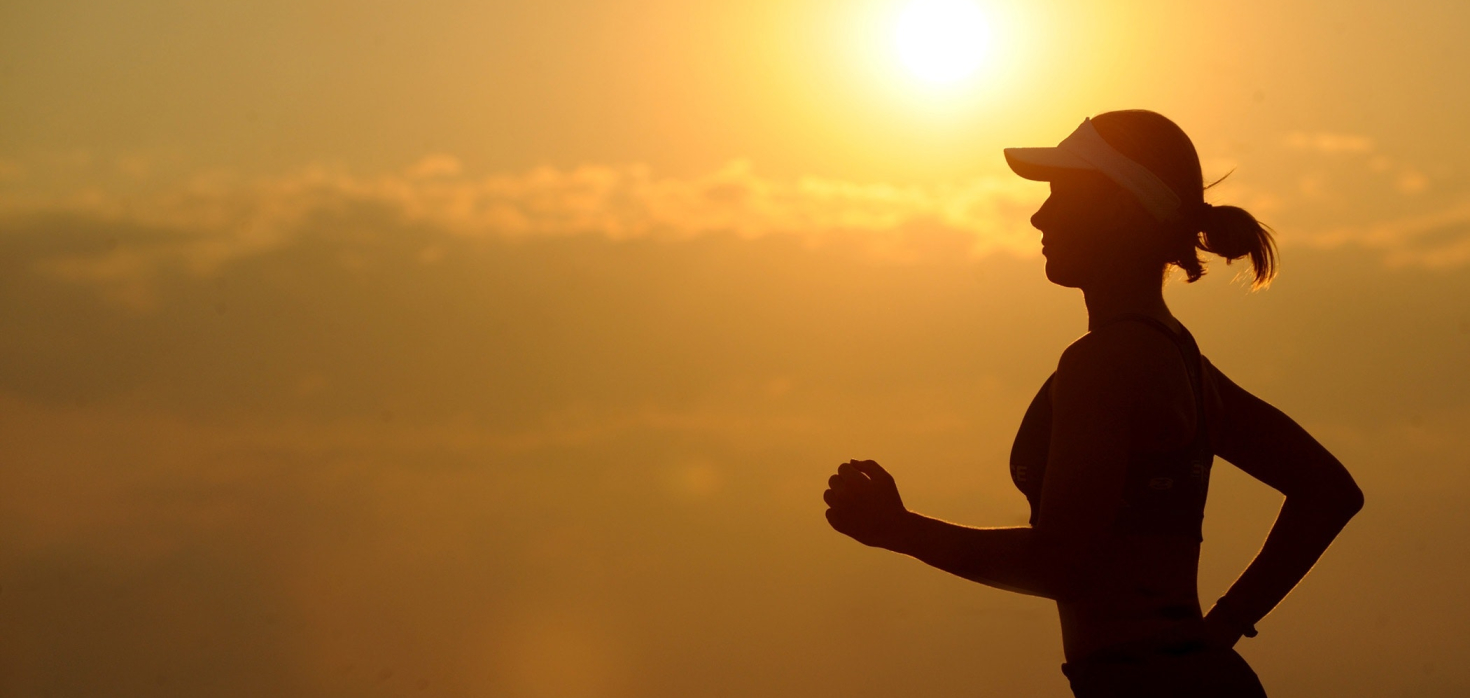

>In today's modern, fast-paced world, many women frequently find themselves immersed in full-time jobs, spending extensive hours at the computer or in meetings, completely engrossed in their work. This lifestyle frequently leads to an increase in sedentary behaviours, a decline in overall health, and can have adverse effects on one's psychological state. To foster well-being and nurture healthier habits, a consistent source of support and guidance in managing daily routines is essential.
>
>This is precisely where the Bellabeat app comes into play, setting itself apart from conventional fitness applications. It's not just a tool for tracking physical activity; rather, it serves as a compassionate companion that empathizes with the unique challenges of balancing professional and personal responsibilities while striving for improved health. Bellabeat is committed to offering daily recommendations and motivation, ensuring that all women can embark on a journey towards a more balanced and health-conscious lifestyle.

### **Innovative Pathways for Bellabeat Advancement.** 

To ensure Bellabeat's marketing strategy development I suggest the following:
* A **notification system**, either user-defined or AI-driven (capable of learning user routines), could offer a range of features, including reminders to go to bed, prompts to stand up and take breaks during work, and notifications for users who haven't completed their daily physical activity.
* To engage and motivate more users to exercise, Bellabeat could **create weekly and monthly challenges**. These challenges would allow users to select the type of activity and its difficulty level, thereby encouraging them to actively participate in physical activities.
* Bellabeat has the opportunity to introduce features that **enable users to connect with friends** and establish groups for sharing their activities, engaging in friendly challenges, providing mutual motivation, and organizing group activities.
* To enhance user support within the app, Bellabeat could introduce **mindfulness features** that utilize data from their smart devices to calculate individual stress levels. The app could then send notifications prompting users to engage in breathing exercises. Additionally, Bellabeat could offer meditation sessions that users can practice before bedtime, helping to reduce the disparity between time spent in bed and actual sleep.
* Given that Bellabeat already offers a paid nutrition support service, they could consider creating a feature that allows users to **input their dietary intake**. This feature could calculate calorie intake and determine whether users are adhering to the recommended macronutrient levels for their bodies, helping them stay on track toward their fitness goals.

>I'm grateful for the time and attention you've dedicated to reviewing my report! This is my first R project, and I would greatly appreciate any advice or guidance you can provide.